In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# df['TotalCharges'] = df['TotalCharges'].astype('float') # string to float conversion not supported for astype method
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# check for null values since it was of type object
df['TotalCharges'].isnull().values.any()

True

In [8]:
df[df['TotalCharges'].isnull()][['customerID','TotalCharges','Churn']]

customerID  TotalCharges Churn
488   4472-LVYGI           NaN    No
753   3115-CZMZD           NaN    No
936   5709-LVOEQ           NaN    No
1082  4367-NUYAO           NaN    No
1340  1371-DWPAZ           NaN    No
3331  7644-OMVMY           NaN    No
3826  3213-VVOLG           NaN    No
4380  2520-SGTTA           NaN    No
5218  2923-ARZLG           NaN    No
6670  4075-WKNIU           NaN    No
6754  2775-SEFEE           NaN    No

In [9]:
df.drop(df.loc[df['TotalCharges'].isnull()].index, inplace=True)
df = df.reset_index(drop=True)

In [10]:
df['gender'].replace({'Female': 1, 'Male': -1}, inplace=True)
df['Partner'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['Dependents'].replace({'Yes': 1, 'No': 0}, inplace=True)

# encode columns of type object
for feature in df.columns:
    if df[feature].dtype == 'O':
        valTypes = df[feature].unique()
        print(valTypes)
        # if list only contains yes and no encode like above
        if len(valTypes) == 2 and 'Yes' in valTypes and 'No' in valTypes:
            df[feature].replace({'Yes': 1, 'No': 0}, inplace=True)
        # else: convert column to type category, encoded column
        else:
            df[feature] = df[feature].astype('category')
            df[feature+"_Enc"] = df[feature].cat.codes

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [11]:
df.head(5)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE      -1              0        0           0      34   
2  3668-QPYBK      -1              0        0           0       2   
3  7795-CFOCW      -1              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  MultipleLines_Enc InternetService_Enc OnlineSecurity_Enc OnlineBackup_Enc  \
0                 1                   0                  0                2   
1                 0                   0                  2                0   
2                 0                   0                  2                2   
3                 1                   0                  2                0   
4                 0                   1                  0                0   

  DeviceProtection_Enc TechSupport_Enc  StreamingTV_Enc StreamingMovies_Enc  \
0                    0               0                0                   0   
1                    2               0                0                   0   
2                    0               0                0                   0   
3                    2               2                0                   0   
4                    0               0                0                   0   

   Contract_Enc  PaymentMethod_Enc  
0             0                  2  
1             1                  3  
2             0                  3  
3             1                  0  
4             0                  2  

[5 rows x 32 columns]

In [12]:
df.Churn.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

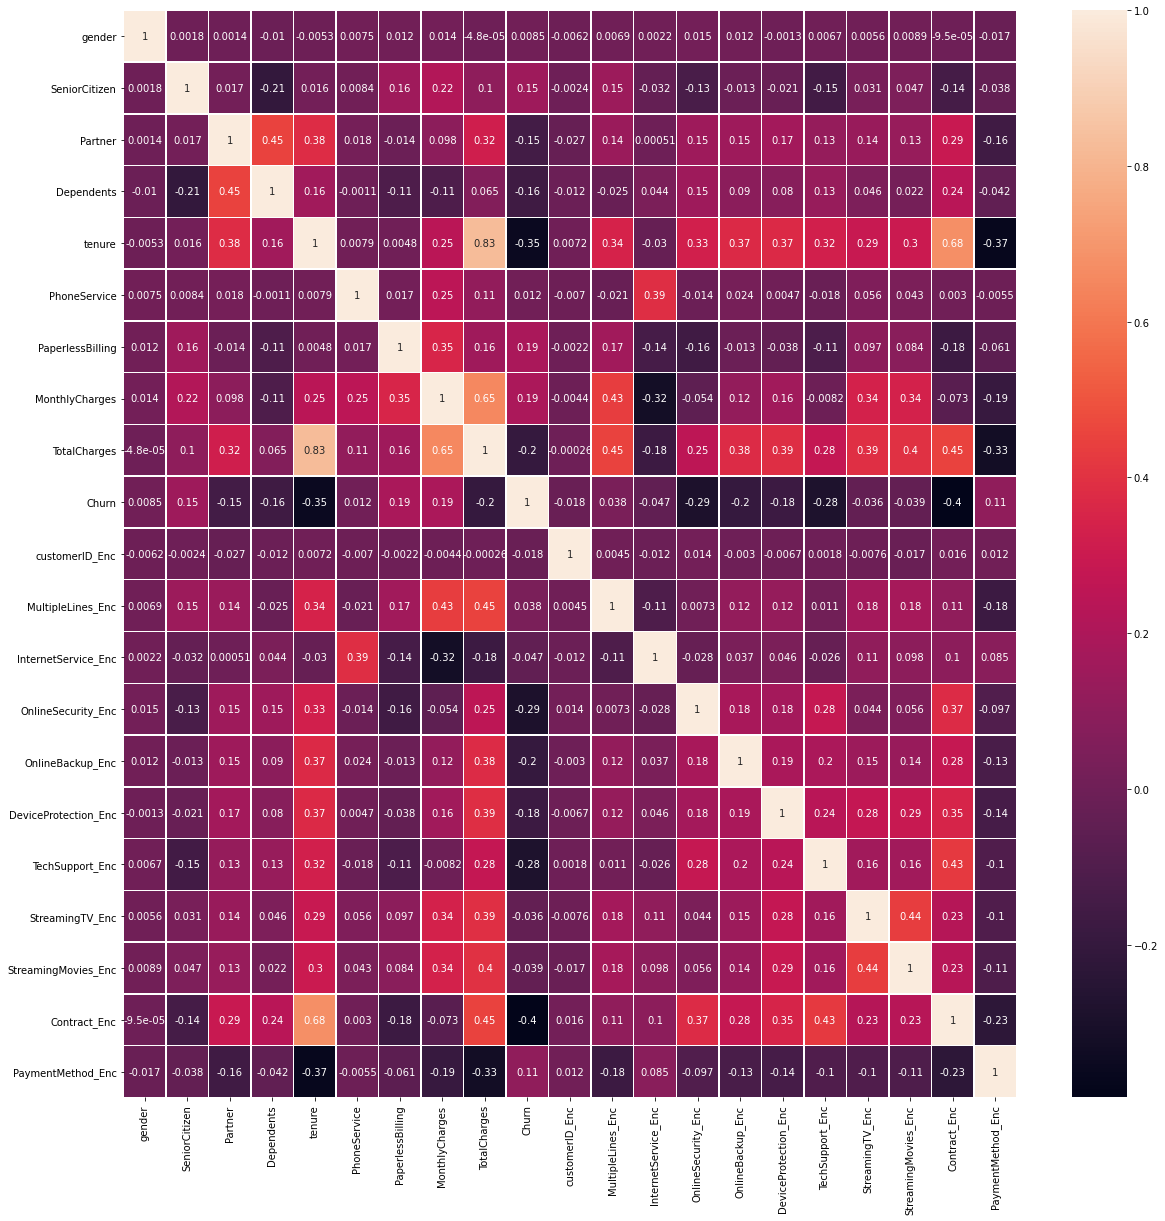

In [13]:
# Pearson Correlation Matrix
import seaborn as sns
plt.subplots(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.5)
plt.show()

In [14]:
corr['Churn'].sort_values(ascending=False)

Churn                   1.000000
MonthlyCharges          0.192858
PaperlessBilling        0.191454
SeniorCitizen           0.150541
PaymentMethod_Enc       0.107852
MultipleLines_Enc       0.038043
PhoneService            0.011691
gender                  0.008545
customerID_Enc         -0.017858
StreamingTV_Enc        -0.036303
StreamingMovies_Enc    -0.038802
InternetService_Enc    -0.047097
Partner                -0.149982
Dependents             -0.163128
DeviceProtection_Enc   -0.177883
OnlineBackup_Enc       -0.195290
TotalCharges           -0.199484
TechSupport_Enc        -0.282232
OnlineSecurity_Enc     -0.289050
tenure                 -0.354049
Contract_Enc           -0.396150
Name: Churn, dtype: float64

In [15]:
X = df[['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod_Enc', 'gender', 'TotalCharges']]
y = df['Churn']

In [16]:
X = X.to_numpy()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [18]:
DT = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

[Text(0.3136561114363292, 0.9861111111111112, 'X[0] <= 27.675\nentropy = 0.841\nsamples = 5625\nvalue = [4108, 1517]'),
 Text(0.08976683937823834, 0.9583333333333334, 'X[5] <= 67.025\nentropy = 0.457\nsamples = 1269\nvalue = [1147, 122]'),
 Text(0.05552012754085293, 0.9305555555555556, 'X[2] <= 0.5\nentropy = 0.93\nsamples = 226\nvalue = [148, 78]'),
 Text(0.04344360302909526, 0.9027777777777778, 'X[5] <= 36.675\nentropy = 0.893\nsamples = 213\nvalue = [147, 66]'),
 Text(0.023116779593463532, 0.875, 'X[5] <= 19.875\nentropy = 0.951\nsamples = 154\nvalue = [97, 57]'),
 Text(0.007014746911119968, 0.8472222222222222, 'X[3] <= 1.5\nentropy = 0.787\nsamples = 51\nvalue = [39, 12]'),
 Text(0.005739338381825428, 0.8194444444444444, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.008290155440414507, 0.8194444444444444, 'X[4] <= 0.0\nentropy = 0.854\nsamples = 43\nvalue = [31, 12]'),
 Text(0.003826225587883619, 0.7916666666666666, 'X[3] <= 2.5\nentropy = 0.94\nsamples = 28\nvalue = [18, 

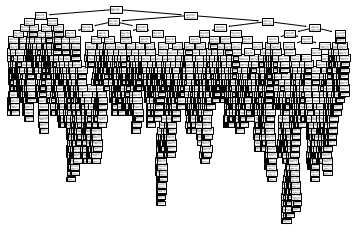

In [19]:
tree.plot_tree(DT)

In [20]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Churn_DTree") 

'Churn_DTree.pdf'

In [21]:
%matplotlib inline
dot_data = tree.export_graphviz(DT, out_file=None,
                feature_names=['MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod_Enc', 'gender', 'TotalCharges'],
                class_names=['No', 'Yes'],
                filled=True, 
                rounded=True,
                special_characters=True)            
graph = graphviz.Source(dot_data)  
graph 

In [22]:
# predict employee with 30 in monthly charges, has paperless billing, is a Senior Citizen, uses credit card as payment method, is male, and total charges are 50
# Features: 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod_Enc', 'gender', 'TotalCharges'
DT.predict([[30,1,1,3,-1,50]])

array([1], dtype=int64)

In [23]:
''' Loop through predicting X_test data compare with y_test, get accuracy score'''
from sklearn.metrics import accuracy_score
pred = DT.predict(X_test)
accuracy_score(y_test, pred)

0.7356076759061834

In [ ]:
''' Let's see if we can improve our model by using Bootstrap Aggregation to find the best decision tree '''

In [24]:
''' use random forrest bagging to get the best model'''
# https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263
# https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

baseClassifier = RandomForestClassifier(n_estimators=100, n_jobs=-1) # create 100 trees, use all available cpu cores

# Tune Random Forest #

# define randomized grid search protocol (we define a range of values for our parameters from which the grid search algorithm randomly pick and choose until it finds a set that performs the best)

# Number of trees in random forest
n_estimators = np.linspace(100, 2000, int((2000-100)/100) + 1, dtype=int) 
# Maximum number of levels in tree
max_depth = [5, 10, 20, 50, 65, 80]
# Minimum number of samples required to split a node
min_samples_split = [1.0, 2, 5, 10, 15, 20, 30]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion = ['gini', 'entropy']

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap,
               'criterion': criterion}

# Fit the classifier on the parameters found from the random search
rf_dt_opt = RandomizedSearchCV(estimator = baseClassifier,
                               param_distributions = param_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               n_jobs = -1)

# alternatively, we can run a standard grid search, however this iterates all parameter options and is more computationally 
# grid_rf_search = GridSearchCV(estimator = rf_grid, 
#                              param_grid = param_grid, 
#                              cv = 5, n_jobs = 8, verbose = 2)
# grid_rf_search.fit(training, training_labels)

rf_dt_opt.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 50, 65, 80],
                                        'min_samples_split': [1.0, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])},
                   verbose=2)

In [25]:
rf_dt_opt.best_params_

{'n_estimators': 1900,
 'min_samples_split': 20,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [26]:
''' Unfortunately we don't have a way to output the best tree with scikit, but it seems there was an increase in accuracy'''
print (rf_dt_opt.score(X_train, y_train))
print(rf_dt_opt.score(X_test, y_test))

0.8375111111111111
0.8123667377398721
